In [1]:
import numpy as np
% matplotlib inline

In [2]:
def parity_plots(y_test, pred_test,
                 y_train=None, pred_train=None,
                titles = None):
    """Make parity plots for  16 regression outputs
    **In the future make it so any number of parity plots can be accomidate
    Args:
        y_test (np.array): expected values for test dataset 
            (shape = samples X values, currently expected as samples X 16) 
        pred_test (np.array): predicted values from test dataset
        y_train (np.array, optional): expected values from test dataset 
        pred_test (np.array, optional): predicted values from test dataset
        titles (list of strings, optional) : list of strings to use as tiles on plots
    
    Returns:
        fig: (matplotlib.figure.Figure) : Parity Plots
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import gridspec
    from sklearn.metrics import r2_score
    
    # Define colors for test and train
    # http://colorbrewer2.org/#type=qualitative&scheme=Set1&n=3
    c_low = [55 / 255, 126 / 255, 184 / 255]
    c_high = [228 / 255, 26 / 255, 28 / 255]
    c_train = [77 / 255, 175 / 255, 74 / 255, 0.4]
       
    fig = plt.figure(figsize=(15, 21))
    
    outer = gridspec.GridSpec(4, 4, wspace=0.5, hspace=0.2)
    
    
    # Generate a parity plot for each class using a loop
    for i in range(0, pred_test.shape[1]):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                        subplot_spec=outer[i], wspace=0.1, hspace=0.4,
                                                height_ratios=[3,1])
        
        #first axis - parity plot
        ax = plt.Subplot(fig, inner[0])
        
        # calculate appropriate scale for x and y axis
        maximums = [np.max(pred_test[:, i]), np.max(y_test[:, i])] 
        minimums = [np.min(pred_test[:, i]), np.min(y_test[:, i])]
        ax_max = np.max(maximums)
        ax_min = np.min(minimums)
        ax_range = ax_max - ax_min
        #add some padding so no data are on the edges
        ax_max = ax_max + ax_range*.25
        ax_min = ax_min - ax_range*.25

        # add the training data to the plot
        if y_train is None:
            pass
        else:
            ax.scatter(y_train[:, i], pred_train[:, i], color=c_train)
        
        # plot the test data
        # select blue color for low MW, select red color for high MW
        if i<7:
            color = c_low
        else:
            color = c_high
        ax.scatter(y_test[:, i], pred_test[:, i], color=color)
        # add perfect prediction line
        ax.plot([ax_min, ax_max], [ax_min, ax_max], color='k',
                 label='Perfect Prediction', linewidth=3)
        
        ax.set_ylim(ax_min, ax_max)
        ax.set_xlim(ax_min, ax_max)
        ax.set_xlabel('Actual', fontsize=14)
        ax.set_ylabel('Predicted', fontsize=14)
        ax.tick_params(labelsize=12)
        if titles is None:
            pass
        else:
            ax.set_title(titles[i], fontsize=16, weight='bold')
# add an option for putting a letter on each plot later
#         # add letters to each plot
#         letter = ['A', 'B', 'C']
#         bbox_props = dict(boxstyle="round, pad=0.1", fc="white", ec="white", lw=2)
#         plt.text(-0.5, 6.5, letter[i], ha="center", va="center",
#             size=20,
#             bbox=bbox_props)     
        fig.add_subplot(ax)
        
        ######## Put R^2 values in the second panel below the plot #########
        ax = plt.Subplot(fig, inner[1])
        
        # Calulate and report R^2 train if training data provided
        if y_train is None:
            pass
        else:
            r2_train = r2_score(y_train[:, i], pred_train[:, i])
            t = ax.text(0.5,0.5, '$R^2$ train = %.3f' % r2_train, size=14)
            t.set_ha('center')
        
        # Calulate and report R^2 test
        r2_test = r2_score(y_test[:, i], pred_test[:, i])
        t = ax.text(0.5, 0.2, '$R^2$ test = %.3f' % r2_test, size=14)
        t.set_ha('center')
        fig.add_subplot(ax)
        
        #hide the axis
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.axis('off')

    return fig

# generate some random test and train data for testing this function
def gen_data(n):
    """generate data for testing parity plot function
    n specifies how many classes (columns)"""
    
    #generate training data
    y_train = np.random.uniform(low=0, high=10, size=(600, n))
    error = np.random.uniform(low=-1, high=1, size=(600, n))
    pred_train = y_train + error

    # example test data
    y_test = np.random.uniform(low=0, high=10, size=(100, n))
    error = np.random.uniform(low=-2, high=2, size=(100, n))
    pred_test = y_test + error
    
    return y_test, pred_test, y_train, pred_train

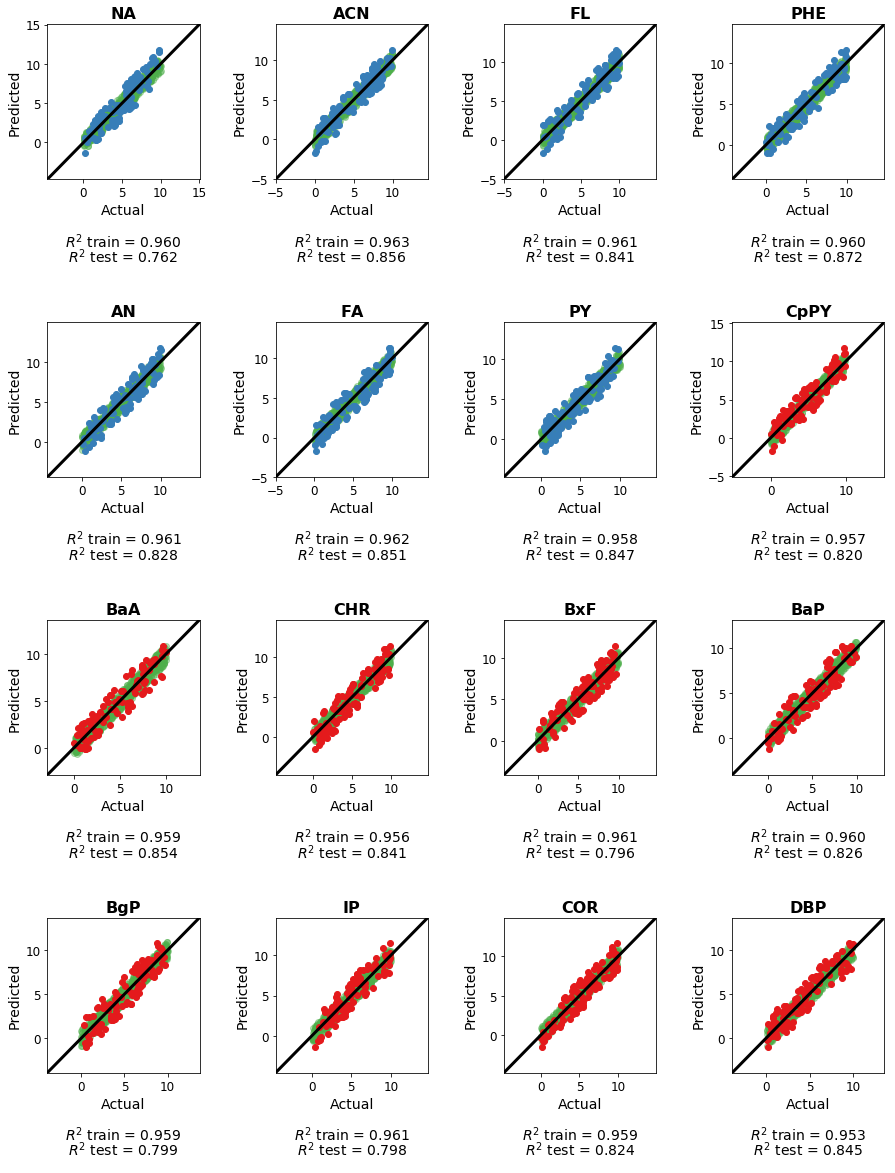

In [3]:
y_test, pred_test, y_train, pred_train = gen_data(16)

titles = ['NA','ACN','FL','PHE', 'AN', 'FA', 'PY',
          'CpPY','BaA','CHR','BxF','BaP','BgP',
         'IP','COR','DBP']

fig = parity_plots(y_test, pred_test, y_train=y_train, pred_train=pred_train, titles=titles)